In [ ]:
#구글 드라이브 연결
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
#그래프의 전체적인 설정을 하는 객체
import matplotlib as mpl
#그래프를 그리는 객체
import matplotlib.pyplot as plt

In [ ]:
#그래프의 글자를 선명하게 출력하도록 설정 
%config InlineBackend.figure_format = 'retina'
#나눔 글자체 설치 
!apt -qq -y install fonts-nanum

fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-440
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.


In [ ]:
import matplotlib.font_manager as fm
#나눔고딕 글자체의 전체 경로 설정
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
#글자체의 경로와 글자 크기 설정
font = fm.FontProperties(fname=fontpath, size=9)

In [ ]:
#폰트 이름 설정
plt.rc('font', family='NanumBarunGothic') 
#폰트 업데이트
mpl.font_manager._rebuild()

In [ ]:
#20200120~20200720까지의 "코로나 블루" 언급, 관련 기사 불러오기
df = pd.read_csv("/gdrive/My Drive/2020aicurator/Cdata/news.csv")

In [ ]:
#불러온 뉴스 파일
df

,뉴스 식별자,일자,언론사,기고자,제목,통합 분류1,통합 분류2,통합 분류3,사건/사고 분류1,사건/사고 분류2,사건/사고 분류3,인물,위치,기관,키워드,특성추출(가중치순 상위 50개),본문,URL,분석제외 여부
0,2.100801e+06,20200720,아시아경제,박종일,강남구 압구정 개포 자곡동공원 로고라이트 15대 설치,지역>충북,지역>경기,지역>전북,NaN,NaN,NaN,"공승호,정순균","자곡동공원,압구정,강남구,개포,강남,개포동,강남구(,자곡동,압구정동,자곡동 공원,청...",강남구,"강남구,압구정,개포,자곡동공원,설치,로고라이트,강남구,구청장,정순균,지난달,압구정,...","로고라이트,자곡동,빛글씨,강남구,3개소,공승호,코로나19,압구정,개포,주민들,15대...",[아시아경제 박종일 기자] 강남구(구청장 정순균)가 지난달 압구정 개포 자곡동 공원...,http:www.asiae.co.kr/article/2020072008190377129,NaN
1,2.100851e+06,20200720,아주경제,원승일,"['코로나 블루'라면, 농어촌 떠나자]② 코로나19 지친 심신 달랜다...어촌체험휴...",지역>경남,지역>경북,지역>울산,NaN,NaN,NaN,최명용,"경기,충남,화성,휴양마을,수도권,신시도어촌체험휴양마을,군산,중리어촌체험휴양마을,포항...","식후경,다대어촌체험휴양마을,수산어촌체험휴양마을,바지락 칼국수,한국어촌어항공단,서중어...","코로나,블루,농어촌,코로나19,심신,어촌,체험,휴양,마을,어촌어항공단,권역,어촌,체...","코로나19,어촌체험휴양마을,돌미역,어촌어항공단,탐방로,한국어촌어항공단,수산물,부산,...",신종 코로나바이러스 감염증(코로나19) 사태 장기화로 답답함을 느낀다면 확 트인 바...,http://www.ajunews.com/view/20200719183027568,NaN
2,2.100851e+06,20200720,아주경제,원승일,"['코로나 블루'라면, 농어촌 떠나자]① 코로나19에 가족과 힐링하세요...농촌체험...",지역>충북,지역>경남,지역>경북,NaN,NaN,NaN,김보람,"충북,의귀리마,전라남도,초롱이둥지마,휴양,해바리마을,휴양마을,제주도,무봉산,경기도,...","농촌체험,둘레길,농식품부,농림축산식품부,해바리마을,의귀리마을,보은,한국농어촌공사,잘...","코로나,블루,농어촌,코로나19,가족,힐링,6선,농촌,체험,휴양,마을,경기도,초롱이둥...","농촌체험휴양마을,코로나19,보은,경기도,우울감,편백나무,6곳,농촌관광,전라남도,잘산...",본격적인 여름 휴가철이지만 신종 코로나바이러스 감염증(코로나19) 확진이 걱정된다면...,http://www.ajunews.com/view/20200719182516567,NaN
3,1.400201e+06,20200720,대전일보,NaN,[생활속 과학이야기] 코로나19 이후의 뉴노멀과 한의학의 디지털 정신건강관리,사회>의료_건강,사회>교육_시험,NaN,NaN,NaN,NaN,NaN,"뉴노멀,한,경상남도","OECD,뉴노멀,대한민국,한국한의학연구원,한,경기연구원","코로나19,뉴노멀,한의학,디지털,정신,건강,관리,코로나19,장기,생활,변화,마스크,...","코로나19,한의학,우리나라,뉴노멀,불안감,건강관리,정신건강,정신질환,칠정,회원국,연...",코로나19 장기화는 생활의 다양한 변화를 불러왔다. 마스크를 써야만 이용할 수 있는...,http://www.daejonilbo.com/news/newsitem.asp?pk...,NaN
4,1.100611e+06,20200720,서울신문,NaN,"[자치광장] 뉴노멀 시대, 녹색 공간이 K방역이다/박준희 서울 관악구청장",지역>울산,지역>충남,지역>경남,NaN,NaN,NaN,NaN,"서울,신림,관악구,낙성대,뉴노멀,관악산,서울시,치유의","도시농업공원,관악구,관악구청,경작체험원,양봉체험원","뉴노멀,시대,녹색,공간,K방역,관악구청장,박준희,서울,관악구,청장,코로나19,사태,...","관악구,코로나19,힐링,관악산,체험원,코로나,힐링공간,쉼터,1만,박준희,신림선,서울...",코로나19 사태로 소소한 일상이 무너지고 있다. 무더운 날씨에도 마스크를 벗을 수 ...,http://www.seoul.co.kr/news/newsView.php?id=20...,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1572,2.100851e+06,20200204,아주경제,장윤정,"[기획] 신종코로나 확산, 콘서트 쇼케이스 등 행사 잠정중단",문화>전시_공연,문화>방송_연예,문화>음악,NaN,NaN,NaN,김태우,"송파구,서울,올림픽공원,싱가포르,창원,메리홀,광진구","영진위,쇼케이스,보이그룹,YG엔터테인먼트,대신 브이라이브,넷플릭스,서강대,빅히트,쏘...","신종코로,확산,콘서트,쇼케이스,행사,잠정,중단,가요,방송,공연계,각종,문화,행사,감...","쇼케이스,공연장,빅히트,소속사,설명회,넷플릭스,걸그룹,김태우,제작발표회,미니앨범,코...",가요 방송 공연계 등 각종 문화행사들이 신종 코로나바이러스 감염증 우려에 줄줄이 행...,http://www.ajunews.com/view/20200204134205455,NaN
1573,2.100801e+06,20200204,아시아경제,이선애,"""마스크 세정제만 널뛰기?"" 신종 코로나 틈타 불편한 생필품 가격급등",경제>유통,경제>자동차,경제>부동산,NaN,NaN,NaN,NaN,"서울 지역,삼계,서울","한국소비자원,정부,소시모,통계청,코튼앤크림,발아현미리필,소비자시민모임,1372 소비자상담","마스크,세정제,널뛰기,신종,코로,틈타,불편,생필품,가격,급등,생필품,가격,부담,서민...","소비자,판매자,1만,자장면,퍼실파워젤,헨켈홈케어코리아,생필품,세정제,오픈마켓,서울,...",[아시아경제 이선애 기자] 생필품 가격이 오르면서 서민 가계 부담이 커지고 있다. ...,http:www.asiae.co.kr/article/2020020408152207575,NaN
1574,1.600801e+06,20200203,전남일보,최동환 기자,신종 코로나에 세계 스포츠 줄줄이 연기 취소,스포츠>올림픽_아시안게임,국제>국제일반,스포츠>월드컵,NaN,NaN,NaN,NaN,"암만,중국,태국,요르단,한국,하이난성,링수이,세계실내육상선수권대회,난징,아시아,베오...","BWF,세계육상연맹,세계배드민턴연맹(,슈퍼100,중국,경기,대만,세계실내육상선수권대...","신종,코로나,세계,스포츠,연기,취소,배드민턴,중국,마스터스ㆍ,세계,실내,육상,선수권...","중국,코로나바이러스,월드투어,우한,세계실내육상선수권대회,개최지,lpga,난징,한국시...",신종 코로나바이러스가 세계 스포츠에 악재로 작용하고 있다. 감염 확산을 우려해 중국...,https://jnilbo.com/2020/02/03/2020020317073490...,NaN
1575,1.101101e+06,20200129,한국일보,권경성,세계적 요리 학교 ‘르 코르동 블루’ 한국 사찰 음식을 가르친다,문화>종교,NaN,NaN,NaN,NaN,NaN,원경,"프랑스,종로구,한국,서울,영국,런던","한국불교문화사업단장,숙명여대,대한불교조계종","학교,세계,요리,학교,코르동,블루,음식,한국,사찰,세계,요리,학교,블루,코르동,Le...","한국,사업단,코르동,원경,런던,문화원,영국,서울,전통문화",세계 3대 요리 학교 중 하나인 ‘르 코르동 블루(Le Cordon Bleu)’ 런...,http://www.hankookilbo.com/news/npath/?did=KP,NaN


In [ ]:
#제거할 컬럼들
code = ["뉴스 식별자", "기고자", "언론사", "본문", "통합 분류1", "통합 분류2", "통합 분류3", '사건/사고 분류1', '사건/사고 분류2', '사건/사고 분류3', '인물', '위치', '기관', 'URL', '분석제외 여부']

#컬럼 제거
df.drop(code, axis=1, inplace=True)

df

,일자,제목,키워드,특성추출(가중치순 상위 50개)
0,20200720,강남구 압구정 개포 자곡동공원 로고라이트 15대 설치,"강남구,압구정,개포,자곡동공원,설치,로고라이트,강남구,구청장,정순균,지난달,압구정,...","로고라이트,자곡동,빛글씨,강남구,3개소,공승호,코로나19,압구정,개포,주민들,15대..."
1,20200720,"['코로나 블루'라면, 농어촌 떠나자]② 코로나19 지친 심신 달랜다...어촌체험휴...","코로나,블루,농어촌,코로나19,심신,어촌,체험,휴양,마을,어촌어항공단,권역,어촌,체...","코로나19,어촌체험휴양마을,돌미역,어촌어항공단,탐방로,한국어촌어항공단,수산물,부산,..."
2,20200720,"['코로나 블루'라면, 농어촌 떠나자]① 코로나19에 가족과 힐링하세요...농촌체험...","코로나,블루,농어촌,코로나19,가족,힐링,6선,농촌,체험,휴양,마을,경기도,초롱이둥...","농촌체험휴양마을,코로나19,보은,경기도,우울감,편백나무,6곳,농촌관광,전라남도,잘산..."
3,20200720,[생활속 과학이야기] 코로나19 이후의 뉴노멀과 한의학의 디지털 정신건강관리,"코로나19,뉴노멀,한의학,디지털,정신,건강,관리,코로나19,장기,생활,변화,마스크,...","코로나19,한의학,우리나라,뉴노멀,불안감,건강관리,정신건강,정신질환,칠정,회원국,연..."
4,20200720,"[자치광장] 뉴노멀 시대, 녹색 공간이 K방역이다/박준희 서울 관악구청장","뉴노멀,시대,녹색,공간,K방역,관악구청장,박준희,서울,관악구,청장,코로나19,사태,...","관악구,코로나19,힐링,관악산,체험원,코로나,힐링공간,쉼터,1만,박준희,신림선,서울..."
...,...,...,...,...
1572,20200204,"[기획] 신종코로나 확산, 콘서트 쇼케이스 등 행사 잠정중단","신종코로,확산,콘서트,쇼케이스,행사,잠정,중단,가요,방송,공연계,각종,문화,행사,감...","쇼케이스,공연장,빅히트,소속사,설명회,넷플릭스,걸그룹,김태우,제작발표회,미니앨범,코..."
1573,20200204,"""마스크 세정제만 널뛰기?"" 신종 코로나 틈타 불편한 생필품 가격급등","마스크,세정제,널뛰기,신종,코로,틈타,불편,생필품,가격,급등,생필품,가격,부담,서민...","소비자,판매자,1만,자장면,퍼실파워젤,헨켈홈케어코리아,생필품,세정제,오픈마켓,서울,..."
1574,20200203,신종 코로나에 세계 스포츠 줄줄이 연기 취소,"신종,코로나,세계,스포츠,연기,취소,배드민턴,중국,마스터스ㆍ,세계,실내,육상,선수권...","중국,코로나바이러스,월드투어,우한,세계실내육상선수권대회,개최지,lpga,난징,한국시..."
1575,20200129,세계적 요리 학교 ‘르 코르동 블루’ 한국 사찰 음식을 가르친다,"학교,세계,요리,학교,코르동,블루,음식,한국,사찰,세계,요리,학교,블루,코르동,Le...","한국,사업단,코르동,원경,런던,문화원,영국,서울,전통문화"


In [ ]:
#일자를 날짜 YYYY-MM-DD 형식으로 변환해서 date라는 컬럼을 새로 생성.
df['date'] = df['일자'].apply(lambda x: pd.to_datetime(str(int(x)), format='%Y%m%d')) 
df.head()

,일자,제목,키워드,특성추출(가중치순 상위 50개),date
0,20200720,강남구 압구정 개포 자곡동공원 로고라이트 15대 설치,"강남구,압구정,개포,자곡동공원,설치,로고라이트,강남구,구청장,정순균,지난달,압구정,...","로고라이트,자곡동,빛글씨,강남구,3개소,공승호,코로나19,압구정,개포,주민들,15대...",2020-07-20
1,20200720,"['코로나 블루'라면, 농어촌 떠나자]② 코로나19 지친 심신 달랜다...어촌체험휴...","코로나,블루,농어촌,코로나19,심신,어촌,체험,휴양,마을,어촌어항공단,권역,어촌,체...","코로나19,어촌체험휴양마을,돌미역,어촌어항공단,탐방로,한국어촌어항공단,수산물,부산,...",2020-07-20
2,20200720,"['코로나 블루'라면, 농어촌 떠나자]① 코로나19에 가족과 힐링하세요...농촌체험...","코로나,블루,농어촌,코로나19,가족,힐링,6선,농촌,체험,휴양,마을,경기도,초롱이둥...","농촌체험휴양마을,코로나19,보은,경기도,우울감,편백나무,6곳,농촌관광,전라남도,잘산...",2020-07-20
3,20200720,[생활속 과학이야기] 코로나19 이후의 뉴노멀과 한의학의 디지털 정신건강관리,"코로나19,뉴노멀,한의학,디지털,정신,건강,관리,코로나19,장기,생활,변화,마스크,...","코로나19,한의학,우리나라,뉴노멀,불안감,건강관리,정신건강,정신질환,칠정,회원국,연...",2020-07-20
4,20200720,"[자치광장] 뉴노멀 시대, 녹색 공간이 K방역이다/박준희 서울 관악구청장","뉴노멀,시대,녹색,공간,K방역,관악구청장,박준희,서울,관악구,청장,코로나19,사태,...","관악구,코로나19,힐링,관악산,체험원,코로나,힐링공간,쉼터,1만,박준희,신림선,서울...",2020-07-20


In [ ]:
#컬럼제거
c = ["특성추출(가중치순 상위 50개)", "일자"]

df.drop(c, axis=1, inplace=True)

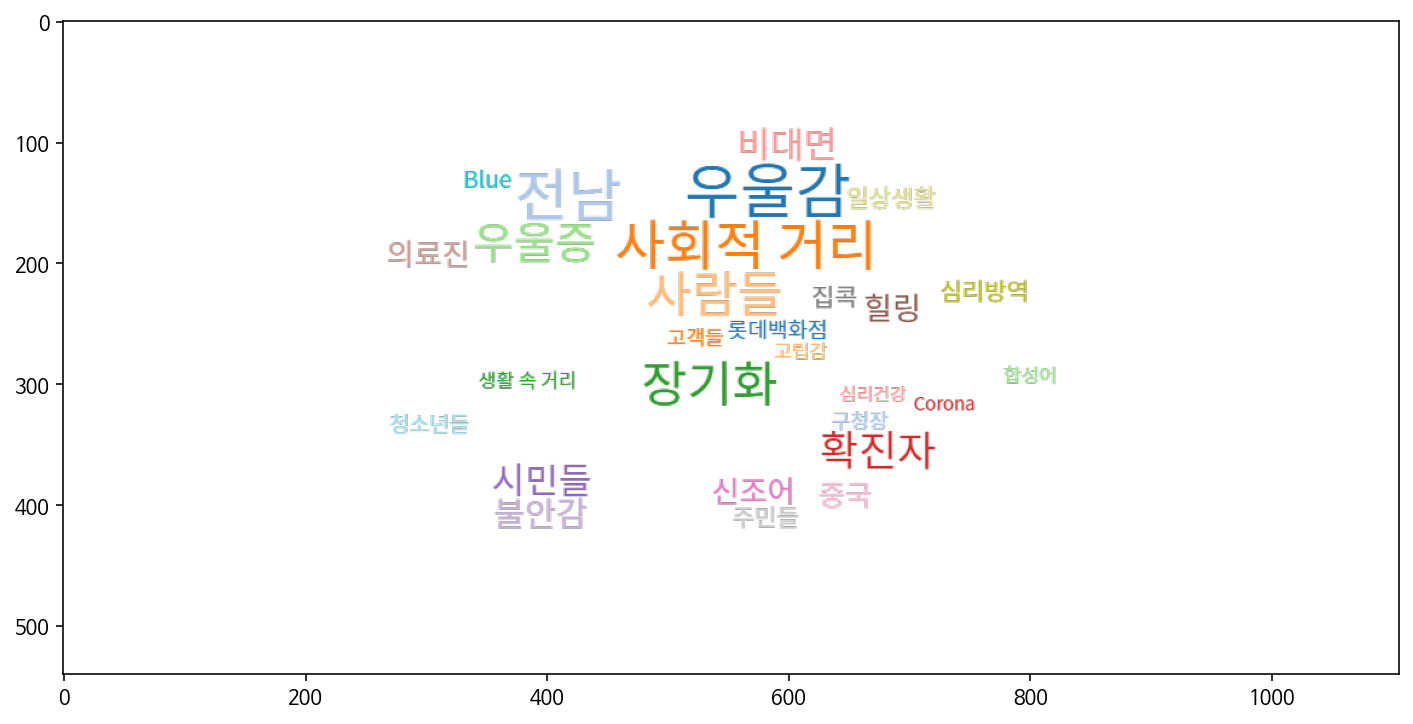

In [ ]:
#기사와 관련된 키워드비율을 나타낸 워드클라우드 이미지 불러오기
import matplotlib.pyplot as plt

plt.figure(figsize=(20,6))
a = plt.imread('/gdrive/My Drive/2020aicurator/Cdata/연관어분석_20200721.png')
plt.imshow(a)

In [ ]:
#워드 클라우드를 바탕으로 키워드 선택 & 임의로 키워드 설정
#코로나 블루와 관련된 키워드를 선택하고자 했습니다
#키워드가 나오는 기사의 개수

df_keyword = pd.DataFrame({
    "우울" : [df["키워드"].str.contains("우울감").sum()+df["키워드"].str.contains("우울증").sum()],
    "불안감" : [df["키워드"].str.contains("불안감").sum()],
    "힐링" : [df["키워드"].str.contains("힐링").sum()],
    "심리방역" : [df["키워드"].str.contains("심리방역").sum()+df["키워드"].str.contains("심리건강").sum()],
    "집콕" : [df["키워드"].str.contains("집콕").sum()],
    "고립감" : [df["키워드"].str.contains("고립감").sum()],
    "스트레스" : [df["키워드"].str.contains("스트레스").sum()],
    "거리두기" : [df["키워드"].str.contains("거리").sum()]  
})

In [ ]:
#행과 열을 바꿔주기
df_keyword = df_keyword.T
print(df_keyword)

        0
우울    851
불안감   228
힐링    169
심리방역   73
집콕    137
고립감    67
스트레스  425
거리두기  722


In [ ]:
#키워드별 언급된 기사개수를 "count"라는 컬럼명으로 변경
df_keyword.columns = ["count"]
df_keyword

,count
우울,851
불안감,228
힐링,169
심리방역,73
집콕,137
고립감,67
스트레스,425
거리두기,722


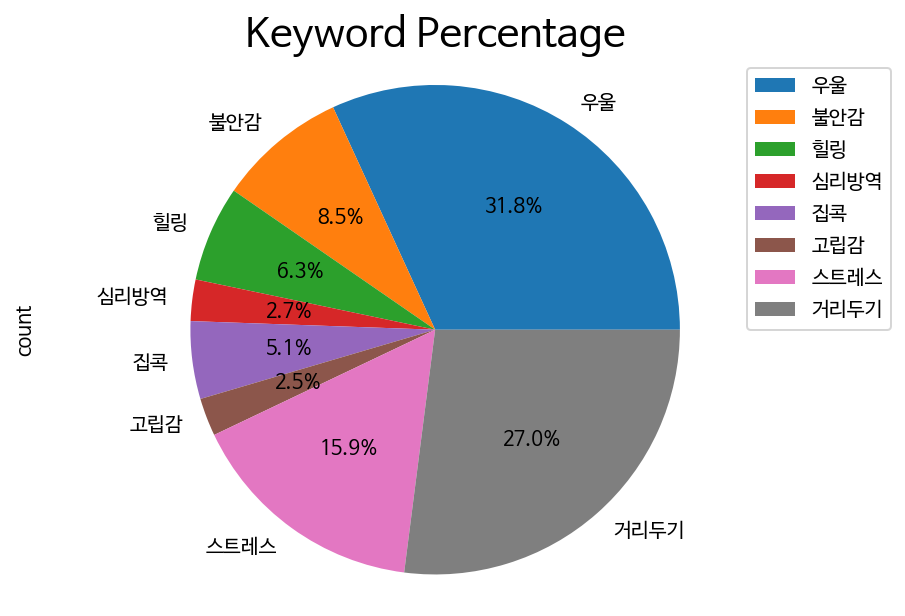

In [ ]:
#원그래프로 시각화
df_keyword["count"].plot(kind="pie",
                         figsize=(7, 5),
                         autopct="%1.1f%%"
                         )

plt.title("Keyword Percentage", size=20)
plt.axis("equal")
plt.legend(labels=df_keyword.index, loc=(0.9, 0.5))